# Data Analysis

In [1]:
# Import Packages

In [2]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

In [3]:
 # Algorithms
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LogisticRegression

In [4]:
# Scaling
from sklearn.preprocessing import StandardScaler
#Cross Validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Searching
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [5]:
# Visualization
import plotly as plot
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score,mean_squared_error
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

In [6]:
# Data read
import pandas as pd
data = pd.read_csv("New_Dataset_Gender_Height_Weight_Age_Calories.csv")

In [7]:
# Data Information

In [8]:
data.head()

,Gender,Height(cm),Weight(kg),Age,Calories
0,1,174,80,20,550.33
1,1,174,80,24,542.33
2,1,174,80,28,534.33
3,1,174,80,32,526.33
4,1,174,80,39,512.33


In [9]:
data[:10] 

,Gender,Height(cm),Weight(kg),Age,Calories
0,1,174,80,20,550.33
1,1,174,80,24,542.33
2,1,174,80,28,534.33
3,1,174,80,32,526.33
4,1,174,80,39,512.33
5,1,174,80,45,500.33
6,1,174,80,49,492.33
7,1,174,80,55,480.33
8,1,174,80,63,464.33
9,1,174,80,71,448.33


In [10]:
data.describe()

,Gender,Height(cm),Weight(kg),Age,Calories
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
mean,0.526316,166.944498,71.845933,45.712919,441.908979
std,0.499546,15.093031,17.579001,17.778648,80.832170
min,0.000000,147.000000,30.000000,20.000000,300.000000
25%,0.000000,153.000000,55.000000,29.000000,400.000000
50%,1.000000,163.000000,71.000000,45.000000,437.330000
75%,1.000000,185.000000,86.000000,61.000000,500.330000
max,1.000000,189.000000,110.000000,78.000000,684.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1045 non-null   int64  
 1   Height(cm)  1045 non-null   int64  
 2   Weight(kg)  1045 non-null   int64  
 3   Age         1045 non-null   int64  
 4   Calories    1045 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 40.9 KB


In [12]:
data.var()

Gender           0.249546
Height(cm)     227.799599
Weight(kg)     309.021260
Age            316.080341
Calories      6533.839688
dtype: float64

In [13]:
data.isnull().sum()

Gender        0
Height(cm)    0
Weight(kg)    0
Age           0
Calories      0
dtype: int64

In [14]:
##############################################################################################################################

In [15]:
# Target

In [16]:
data['Calories']

0       550.33
1       542.33
2       534.33
3       526.33
4       512.33
         ...  
1040    512.33
1041    500.33
1042    462.33
1043    454.33
1044    440.33
Name: Calories, Length: 1045, dtype: float64

In [17]:
data['Calories'].value_counts()

400.000    130
300.000     77
418.000      6
440.000      6
328.330      6
          ... 
430.660      1
590.333      1
439.330      1
620.000      1
350.000      1
Name: Calories, Length: 479, dtype: int64

In [18]:
data['Calories'].unique()

array([550.33 , 542.33 , 534.33 , 526.33 , 512.33 , 500.33 , 492.33 ,
       480.33 , 464.33 , 448.33 , 436.33 , 530.33 , 522.33 , 514.33 ,
       506.33 , 472.33 , 460.33 , 444.33 , 400.   , 498.33 , 490.33 ,
       482.33 , 474.33 , 440.33 , 428.33 , 470.33 , 462.33 , 454.33 ,
       446.33 , 432.33 , 420.33 , 434.33 , 426.33 , 583.   , 581.   ,
       577.   , 569.   , 557.   , 551.   , 545.   , 535.   , 525.   ,
       505.   , 473.   , 517.   , 513.   , 509.   , 497.   , 628.   ,
       620.   , 608.   , 592.   , 578.   , 558.   , 542.   , 528.   ,
       512.   , 598.   , 580.   , 572.   , 534.   , 502.   , 548.   ,
       524.   , 506.   , 492.   , 476.   , 454.   , 438.   , 516.   ,
       496.   , 470.   , 458.   , 432.   , 418.   , 468.   , 456.   ,
       450.   , 440.   , 428.   , 444.   , 424.   , 500.   , 482.   ,
       466.   , 430.   , 464.   , 446.   , 420.   , 562.66 , 550.66 ,
       532.66 , 490.66 , 480.66 , 468.66 , 458.66 , 446.66 , 514.66 ,
       502.66 , 484.

In [19]:
data['Calories'].isnull()


0       False
1       False
2       False
3       False
4       False
        ...  
1040    False
1041    False
1042    False
1043    False
1044    False
Name: Calories, Length: 1045, dtype: bool

In [20]:
##############################################################################################################################

## Visualization

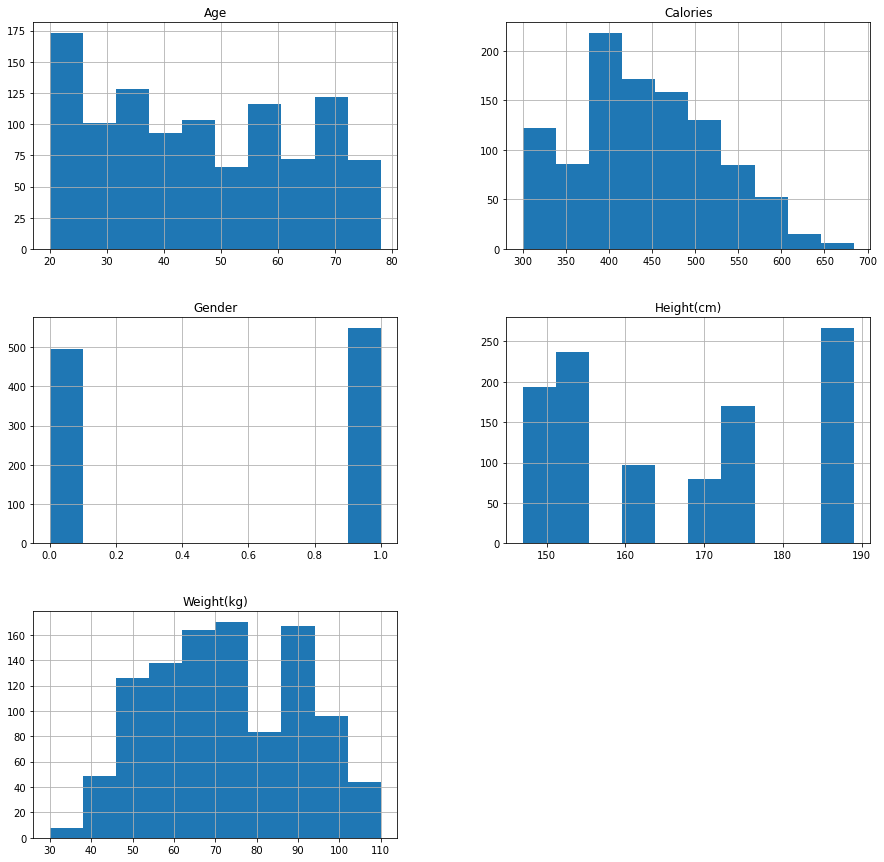

In [22]:
data.hist(figsize=(15,15))
plt.show()

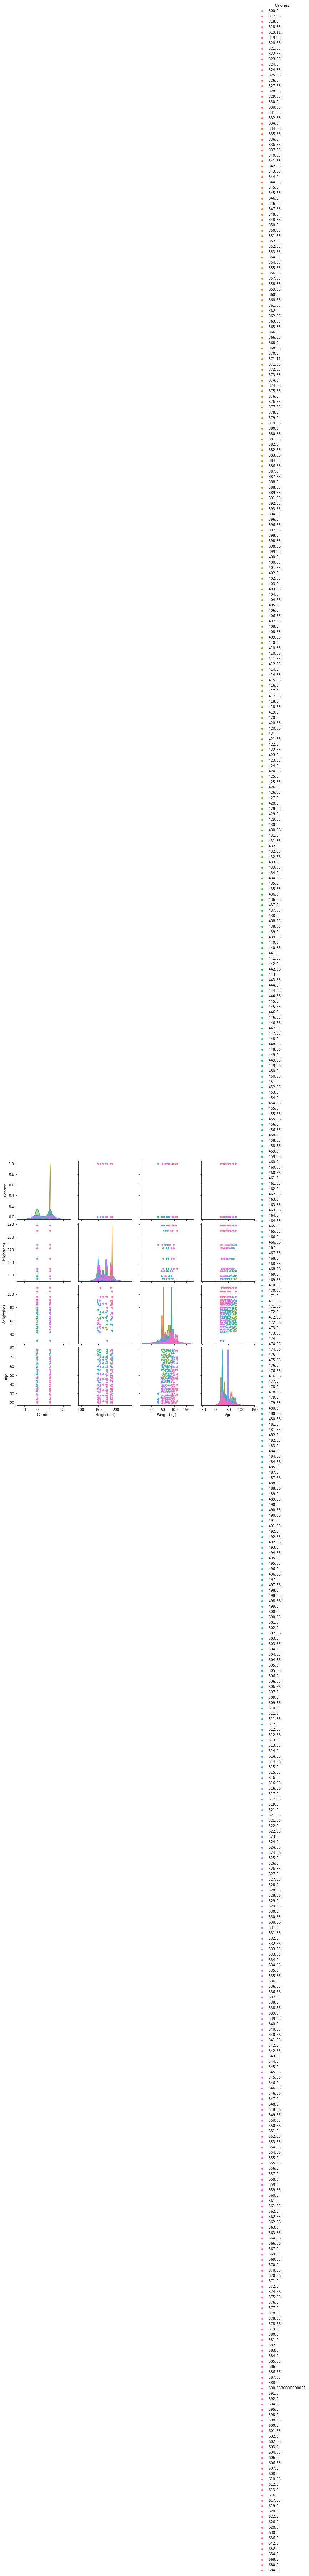

In [23]:
sns.pairplot(data,hue='Calories')

In [24]:
numeric_columns=['Gender','Height(cm)','Weight(kg)','Age','Calories'] 

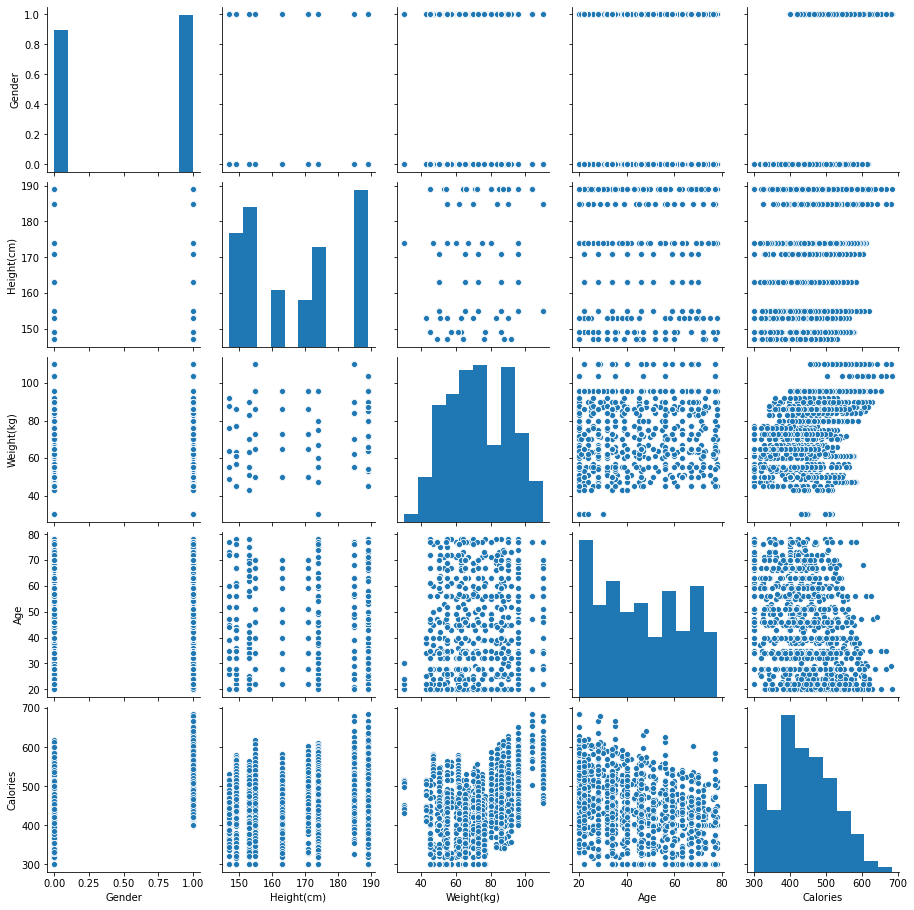

In [25]:
sns.pairplot(data[numeric_columns])

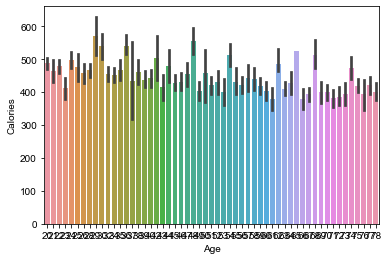

In [26]:
sns.barplot(data["Age"],data['Calories'])
sns.set(rc={'figure.figsize':(40,20)})

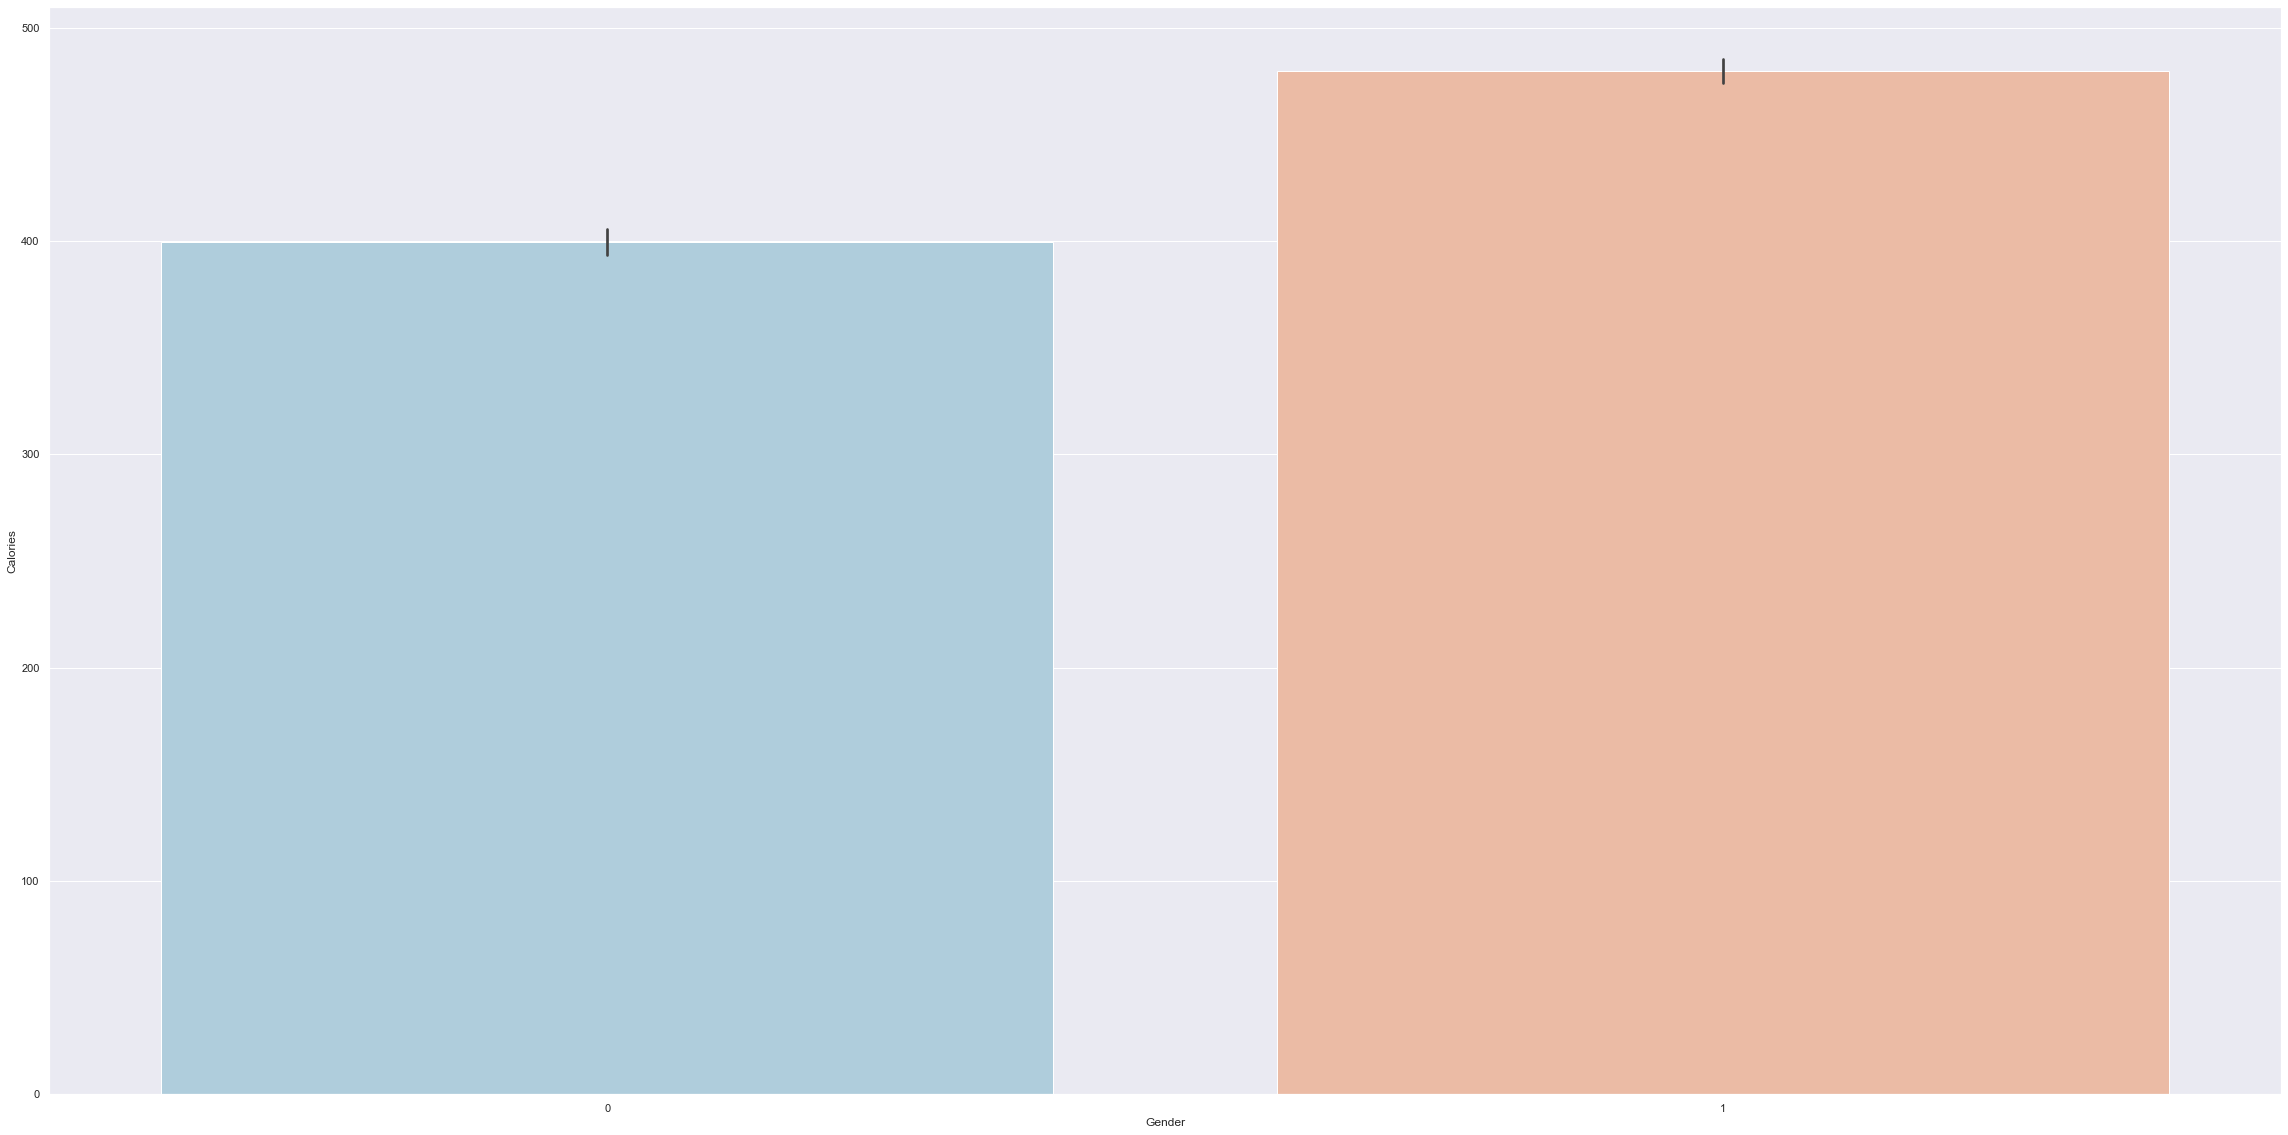

In [27]:
sns.barplot(data["Gender"],data['Calories'],palette='RdBu_r')
sns.set(rc={'figure.figsize':(10,3)})

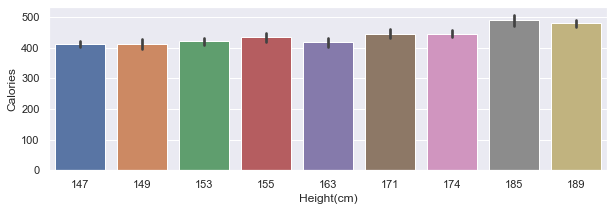

In [28]:
sns.barplot(data["Height(cm)"],data['Calories'])
sns.set(rc={'figure.figsize':(10,4)})

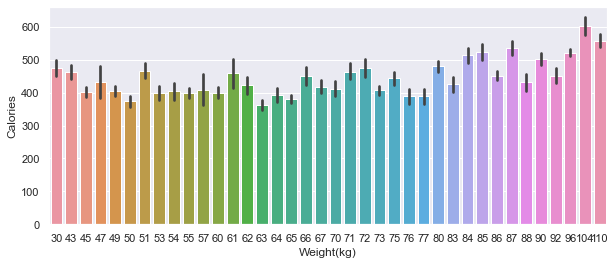

In [29]:
sns.barplot(data["Weight(kg)"],data['Calories'])
sns.set(rc={'figure.figsize':(30,7)})

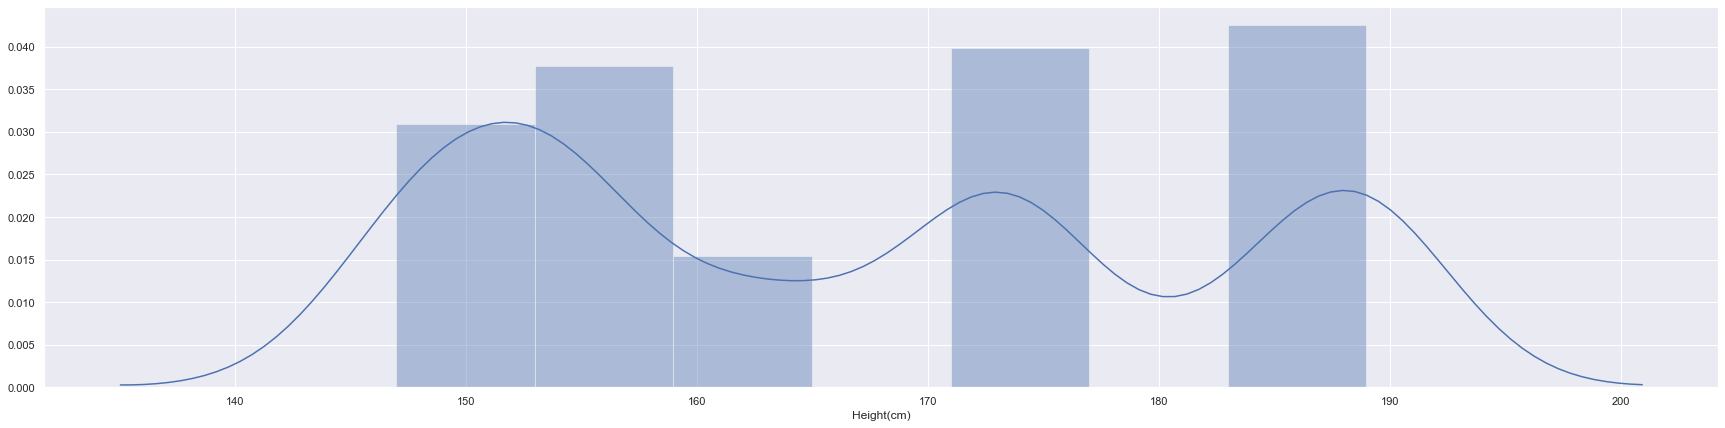

In [30]:
sns.distplot(data["Height(cm)"])

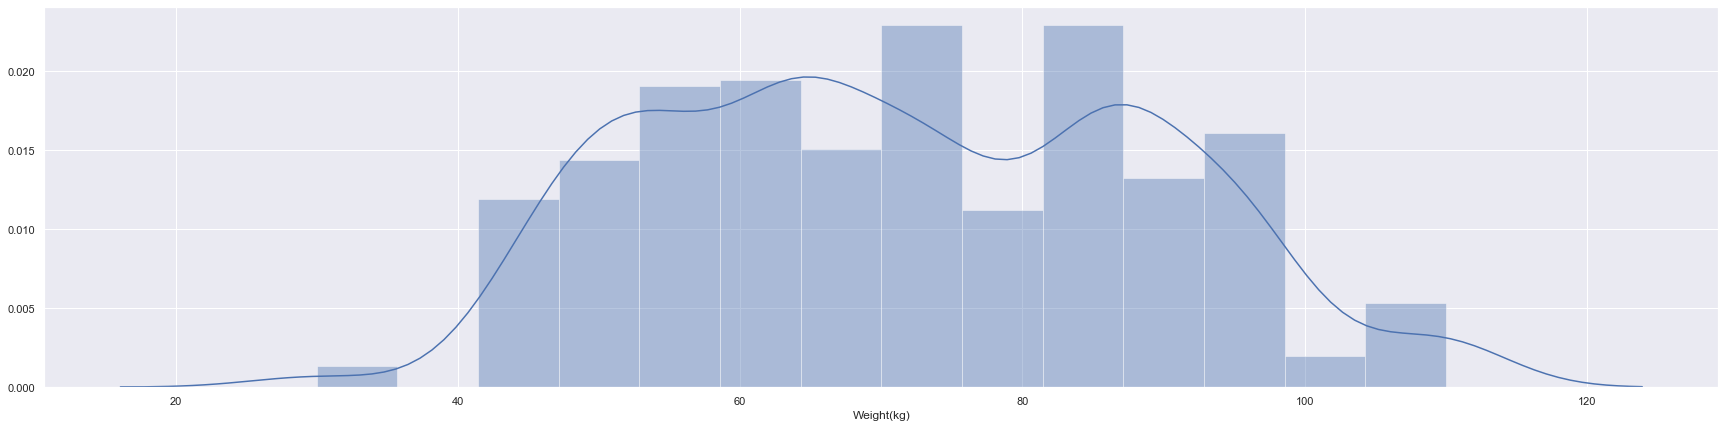

In [32]:
sns.distplot(data["Weight(kg)"])

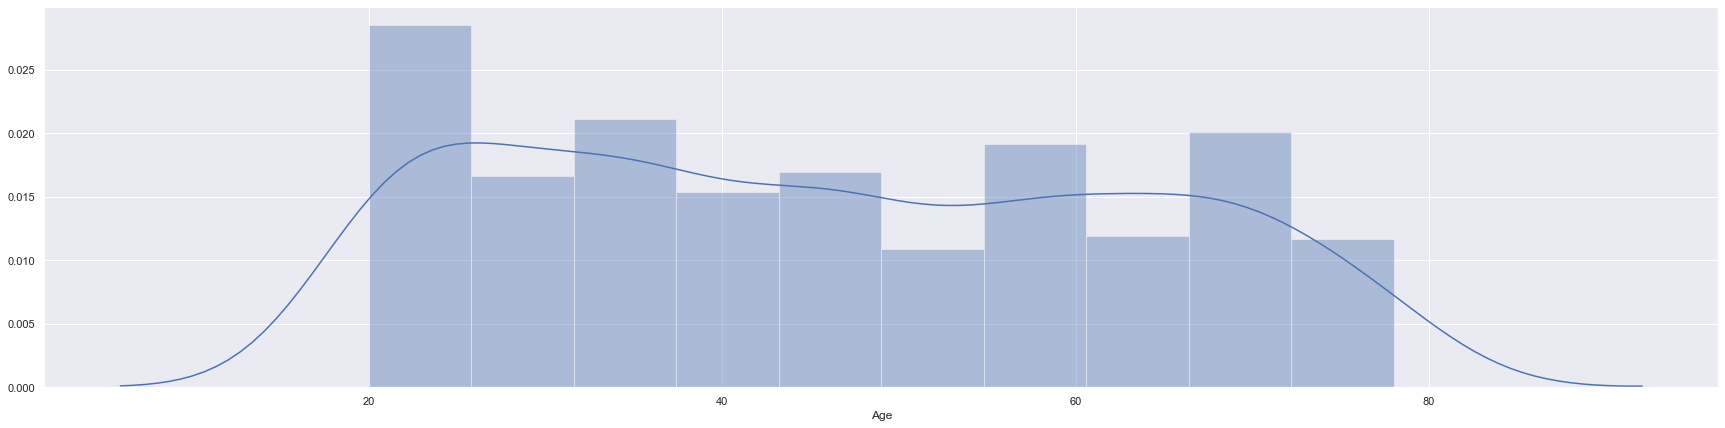

In [33]:
sns.distplot(data["Age"])